PROBLEM STATEMENT

use relevant machine learning model to predict total sales using features like money spent on advertising/marketing.

In [ ]:
## IMPORT LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [ ]:
## LOAD DATA
data = pd.read_csv("Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
#### DOMAIN ANALYSIS
#   sales is your target
#   TV, Radio, Newspaper input variable
#   This is basically tells us about the total sales made by company by investing certain amount of on
#   TV, Radio, Newspaper advertising

BASIC CHECKS


In [ ]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
data.shape

(200, 4)

In [ ]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
data.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
data.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


/tmp/ipython-input-389970140.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.TV,kde=True)


<Axes: ylabel='Density'>

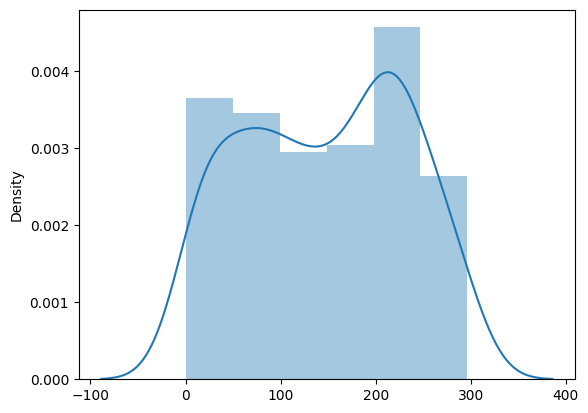

In [ ]:
##  EXPLORATORY DATA ANALYSIS

## UNIVARIANT ANALYSIS

sns.distplot(x=data.TV,kde=True)

<Axes: xlabel='Sales', ylabel='Count'>

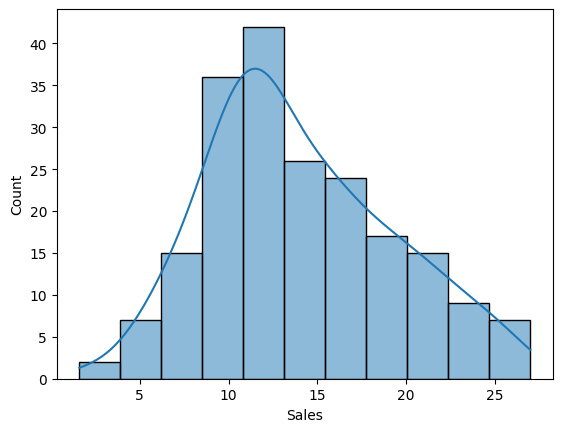

In [ ]:
sns.histplot(x=data.Sales, kde=True)

<Axes: xlabel='Radio', ylabel='Count'>

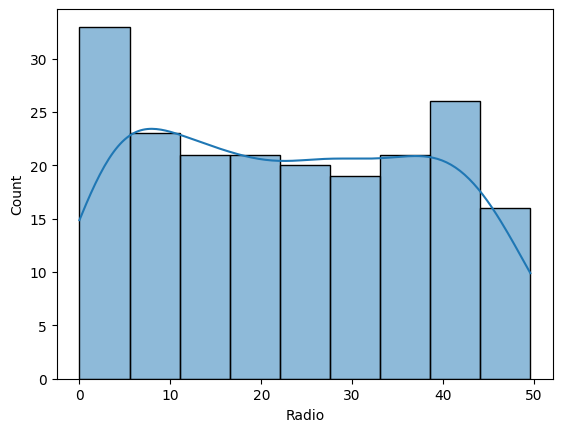

In [ ]:
sns.histplot(x=data.Radio, kde=True)

<Axes: xlabel='Newspaper', ylabel='Count'>

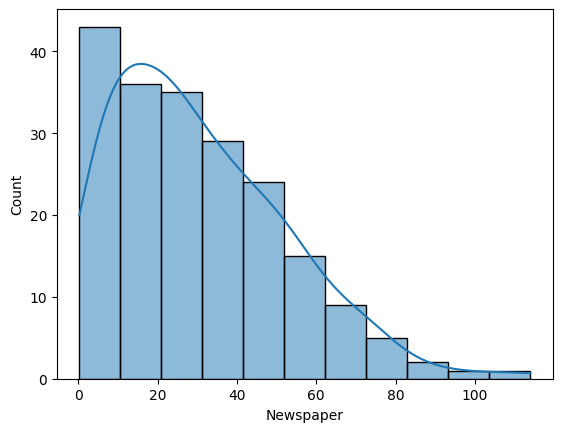

In [ ]:
sns.histplot(x=data.Newspaper, kde=True)

In [ ]:
##      BIVARIANTE ANALYSIS

##      ANALYSIS MULTIPLE VARIABLE

###     analysis how amount spent on TV impact sales

###     As we increase the amount of money spent on TV advertising then sales will increse
#       There is a high correlation between TV and sales
#       more we invest in tv higher will be the sales
#       there is a positive relationship between tv and sales

<Axes: xlabel='TV', ylabel='Sales'>

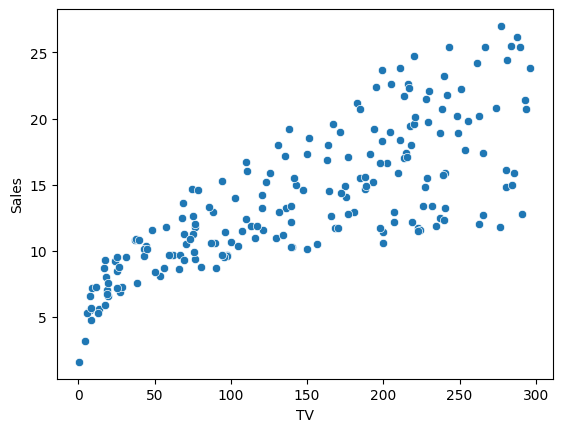

In [ ]:
sns.scatterplot(data,x="TV",y="Sales")

<Axes: xlabel='Radio', ylabel='Sales'>

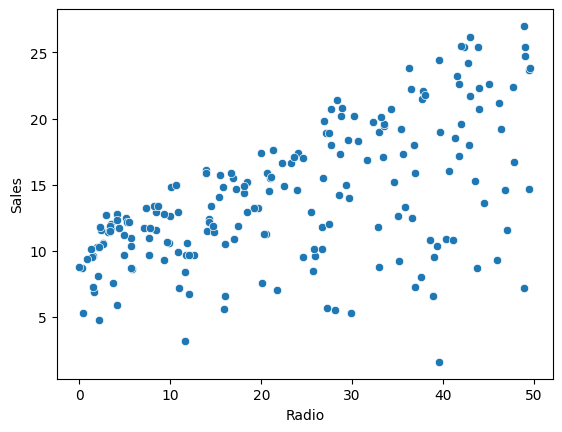

In [ ]:
## analysis how amount spent on radio impact sales

##  there is no much trend or strong relationship between radio and sales
##  investing in radio advertising will have less impact on sales
##  we can see that high investment in radio advertising sometimes sales was high and sometimes sales was low

sns.scatterplot(data,x="Radio",y="Sales")

<Axes: xlabel='Newspaper', ylabel='Sales'>

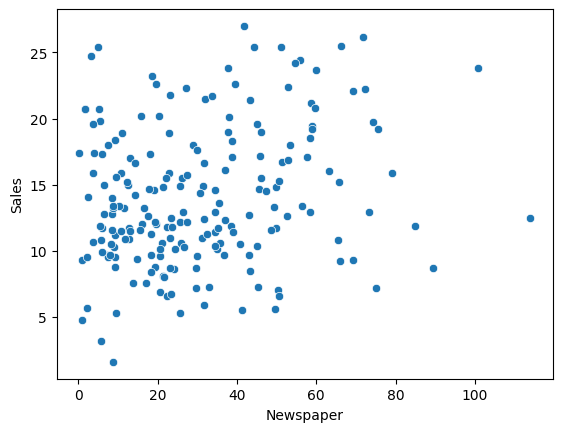

In [ ]:
##  analysis how amount spent on newspaper impact sales

##  there is no relationship between newspaper and sales
##  inversting more or less newspaper advertising will yeild very less sales


sns.scatterplot(data,x="Newspaper",y="Sales")

In [ ]:
####   MAIN  INSIGHTS

##  Television is the best feild for advertising the product to the comapny can yeild more sales
##  inversting in radio will also yeild some good sales but investing newspaper is not really a good idea

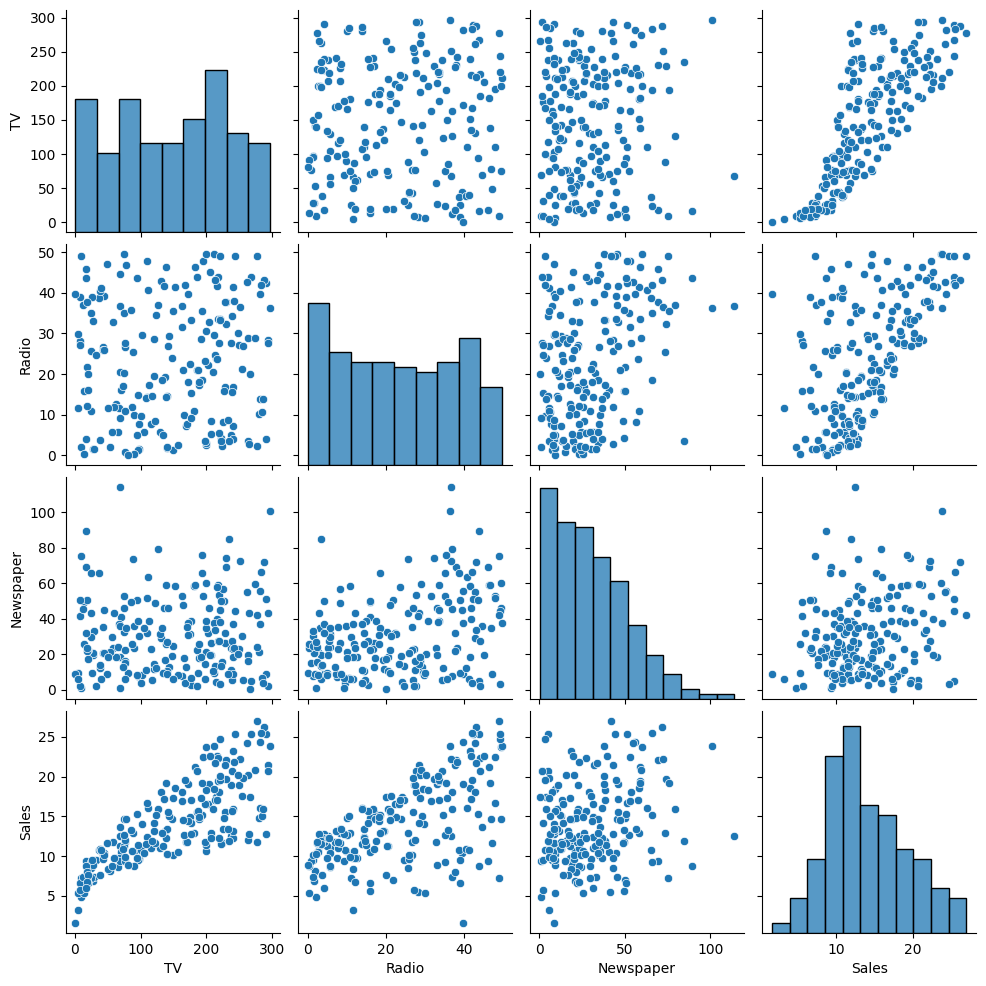

In [ ]:
###    MULTIVARIANT ANALYSIS

sns.pairplot(data)

<Axes: ylabel='Newspaper'>

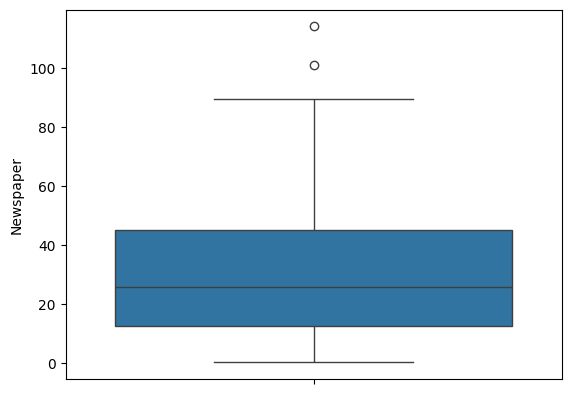

In [ ]:
## CHECK OUTLIER IN NEWSPAPER

sns.boxplot(data.Newspaper)

<Axes: xlabel='Radio'>

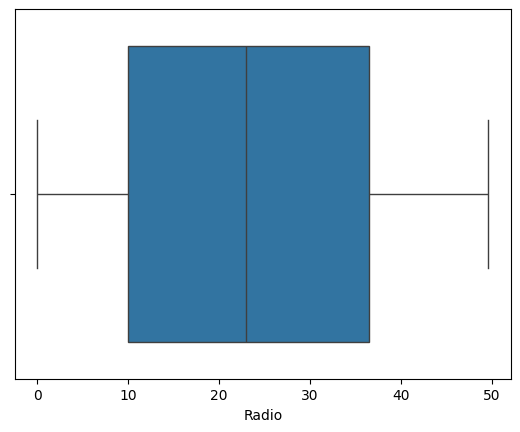

In [ ]:
## CHECK OUTLIER IN RADIO

sns.boxplot(x=data.Radio)

<Axes: xlabel='TV'>

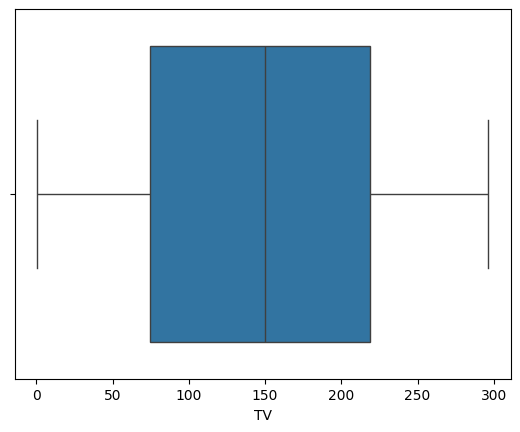

In [ ]:
## CHECK OUTLIER IN TV

sns.boxplot(x=data.TV)

<Axes: xlabel='Sales'>

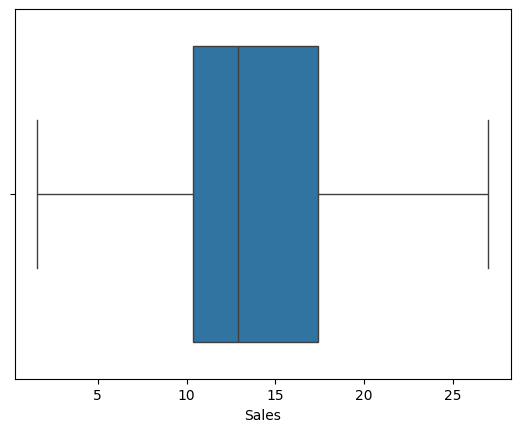

In [ ]:
sns.boxplot(x=data.Sales)

In [ ]:
###  NOTE- handle outlier if outlier is less than 5%
###        if grater than 5% no need to do anything

In [ ]:
##      we can see that there are few outliers  in newspaper
##      outliers in newspaper are seen towards right side


In [ ]:
##    show to find those outliers
##    IQR - use this method when our data is not normal

In [ ]:
#IQR
#FIND Q1 and Q3
#find lower limit and upper limit
#lower_limit = Q1 - 1.5*IQR
#upper_limit = Q3 + 1.5*IQR
#find IQR=Q3-Q1
#find records/value which are greater than upper limit and less than lower limit

In [ ]:
## find q1 and Q3
Q1 = data['Newspaper'].quantile(0.25)
print('lower quartile',Q1)
Q3 = data['Newspaper'].quantile(0.75)
print('upper quartile',Q3)

lower quartile 12.75
upper quartile 45.1


In [ ]:
##find IQR
IQR = Q3 - Q1
print('IQR',IQR)

IQR 32.35


In [ ]:
##find lower limit and upper limit
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print('lower limit',lower_limit)
print('upper limit',upper_limit)

lower limit -35.775000000000006
upper limit 93.625


In [ ]:
##find value above upper_limit
data.loc[data['Newspaper']>upper_limit]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [ ]:
##find value above lower_limit
data.loc[data['Newspaper']<lower_limit]

,TV,Radio,Newspaper,Sales


In [ ]:
#pertcentile
len(data.loc[data['Newspaper']>upper_limit])/len(data)

0.01

In [ ]:
#how to handle outlier
#since data is not normal will replace outlier with median
data.loc[data['Newspaper']>upper_limit,'Newspaper']=data['Newspaper'].median()

<Axes: xlabel='Newspaper'>

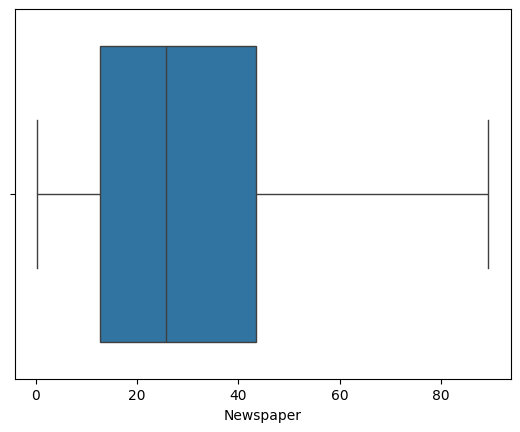

In [ ]:
##   check the outlier in newspaper
sns.boxplot(x=data.Newspaper)

In [ ]:
#feature engineering
##drop irrelvant columns
##selecting best feature


#  drop the columns which has very less correlation with target variable.
#  drop one of the columns if two input variable has high correlation

In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.048462,0.782224
Radio,0.054809,1.000000,0.343141,0.576223
Newspaper,0.048462,0.343141,1.000000,0.215938
Sales,0.782224,0.576223,0.215938,1.000000


<Axes: >

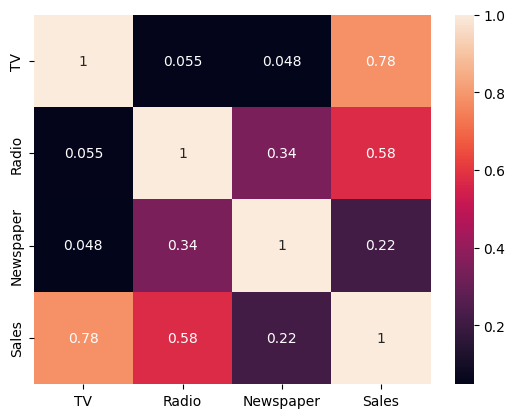

In [ ]:
sns.heatmap(data.corr(),annot=True)
##   annot show you the labels
##   in this newspaper has very less correlation with sales ,since dataset is small we are not dropping newspaper


In [ ]:
#  light color reprecent high correlation
#  dark color reprecent less corr

#  tv 1 ## sales 0.78 correlatin is high
#  radio 0.55 ## sale 0.58 correlation also high
#  newspaper 0.048 ## sale is 0.22 is less correlation

In [ ]:
##  check for multicollinearity the should not be any high correlation among input variable

##  when two input variable is highly correlated means both are presenting same information i.e multicolinearity

In [ ]:
##  heatmap analysis
#   linearity
#   we include columns which has high correlation with target variable
#   we drop colmns which has less correlation with target


#   little or no more multicolinearity
#   we include columns which has less correlation among each other
#   we drop one of the column if two input variable have high correlation

In [ ]:
####   SPLIT DATA x and y

x=data.drop("Sales",axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y=data["Sales"]
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [ ]:
##   SPlit data for training and testing

#  sklearn  -- it is one of the scientific library which include all packages related
#                to machine learning data cleaning and feature engineering

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
x_train.shape

(140, 3)

In [ ]:
x_test.shape

(60, 3)

In [ ]:
# model building
# import linear regreesion model
from sklearn.linear_model import LinearRegression
# initial
model=LinearRegression()
# train model x_train and y_train
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([21.67044772, 16.44214057,  7.6959723 , 17.92004373, 18.67284701,
       23.78223739, 16.27394457, 13.42269301,  9.14356293, 17.31179094,
       14.42990464,  9.8449027 , 17.2802709 , 16.62540858, 15.07397227,
       15.47961091, 12.43025312, 17.33490005, 11.05865532, 18.07242607,
        9.36275321, 12.63756291,  8.72586592, 10.47956609, 11.37539625,
       15.02889063,  9.73770499, 19.45505291, 18.21470547, 17.20618474,
       21.57926586, 14.66996494, 16.28214127, 12.36390476, 19.98141824,
       15.37295571, 14.00873353, 10.07077143, 20.93011592,  7.44257535,
        3.66262039,  7.27284015,  5.99304798, 18.41153712,  8.31194575,
       14.11614394, 14.94222876, 20.3653877 , 20.57832156, 19.5350099 ,
       24.1024301 , 14.86400223,  6.71458035, 19.77139774, 18.95864094,
       12.51430865, 14.19794289,  6.10250084, 15.37877549,  9.57254563])

In [ ]:
y_test

,Sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6
198,25.5
95,16.9
4,12.9
29,10.5
168,17.1


In [ ]:
model.coef_    #slop/coefficient of x , (m)

array([0.04697312, 0.1769425 , 0.00129507])

In [ ]:
#intercept
model.intercept_

np.float64(2.943341674397992)

In [ ]:
##  simple regression
##  y=mx+c
##  multi regression
##  y=(m1*1)+(m2*2)+(m3*3)+c    i.e - y= (0.4*1)+(0.17*2)+(0.05*3)+3.0

In [ ]:
##  assignment
#1  what will be the total sales if my investment on tv=100 ,radio= 50 ,newspaper=10
#2  what will be the total sales if my investment on tv=10 ,radio= 500 ,newspaper=10
#3  what will be the total sales if my investment on tv=5 ,radio= 10 ,newspaper=100
#4  what will be the total sales if my investment on tv=1000 ,radio= 300 ,newspaper=50


In [ ]:
##1 how to make predict
model.predict([[100,50,10]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.50072953])

In [ ]:
##2 predict model
model.predict([[10,500,10]])

##3 predict model
model.predict([[5,10,100]])

##4 predict model
model.predict([[1000,300,50]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([91.89727487])

In [ ]:
## Evaluate model

##  loss functn to know the diff betn actual and predicted value
#   diff error /loss functn in regression algorithm are
#   MSE ,MAE ,RMSE

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [ ]:
##MSE
MSE = mean_squared_error(y_test,y_pred)
MSE

1.9237137082958633

In [ ]:
##MAE
MAE = mean_absolute_error(y_test,y_pred)
MAE

1.0505438455098197

In [ ]:
rmse=np.sqrt(MSE)
rmse

np.float64(1.386980067735605)

In [ ]:
##R2_score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.922670051771285

In [ ]:
# train=x_train , y_train
# predict=x_test
#  evaluate=y_test , y_test